In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
#create path
path = r'C:\Users\jacob\Documents\Data Analytics\Data Immersion\Achievement 6\Energy_GDP_Project'

In [3]:
#import merged inner data
df = pd.read_csv(os.path.join(path, '02 data', 'prepared data', 'energy_gdp_merged_inner.csv'))

In [4]:
#check output
df.head()

,country,year,combined_key,ea_%_pop,%_energy_nuclear,%_energy_renewables,%_energy_fossil_fuels,gdp
0,Afghanistan,2000,"Afghanistan, 2000",4.446891,0.0,0.0,0.0,183.532775
1,Afghanistan,2001,"Afghanistan, 2001",9.294527,0.0,0.0,0.0,183.532775
2,Afghanistan,2002,"Afghanistan, 2002",14.133616,0.0,0.0,0.0,183.532775
3,Afghanistan,2003,"Afghanistan, 2003",18.971165,0.0,0.0,0.0,200.462376
4,Afghanistan,2004,"Afghanistan, 2004",23.814182,0.0,0.0,0.0,221.657662


In [5]:
df.shape

(5711, 8)

In [16]:
#create a subset of the data only contains values greater than 0 and less than 100 for electricity access
#also removes gdp values greater than 50000
ea_gdp_subset = df[(df['ea_%_pop'] < 100) & (df['ea_%_pop'] > 0) & ((df['gdp'] < 50000) & (df['gdp'] > 0))]

In [17]:
ea_gdp_subset.shape

(3807, 8)

In [18]:
3810/5711

0.6671336018210471

In [19]:
#create a subset for analysis removing country,year and combined key columns
df_subset = ea_gdp_subset[['ea_%_pop', '%_energy_nuclear', '%_energy_renewables', '%_energy_fossil_fuels', 'gdp']]

In [20]:
#check shape
df_subset.shape

(3807, 5)

Text(0.5, 1.0, 'Correlation Matrix')

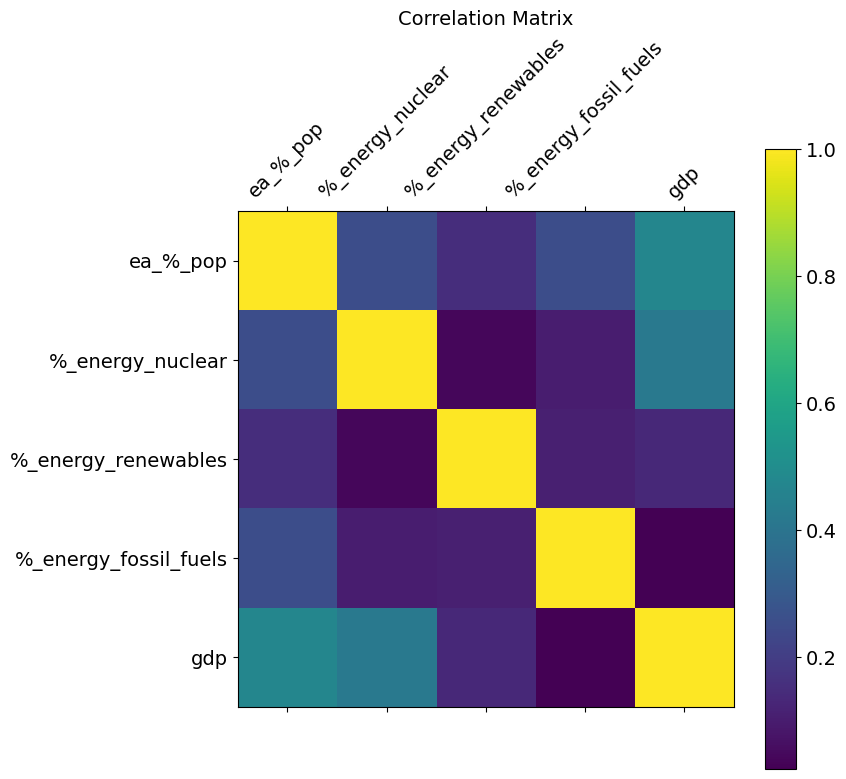

In [21]:
#create a matric heatmap using matplot
f = plt.figure(figsize=(8, 8))
plt.matshow(df_subset.corr(), fignum=f.number)
plt.xticks(range(df_subset.shape[1]), df_subset.columns, fontsize=14, rotation = 45)
plt.yticks(range(df_subset.shape[1]), df_subset.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=14)

Text(0.5, 1.0, 'Correlation Matrix')

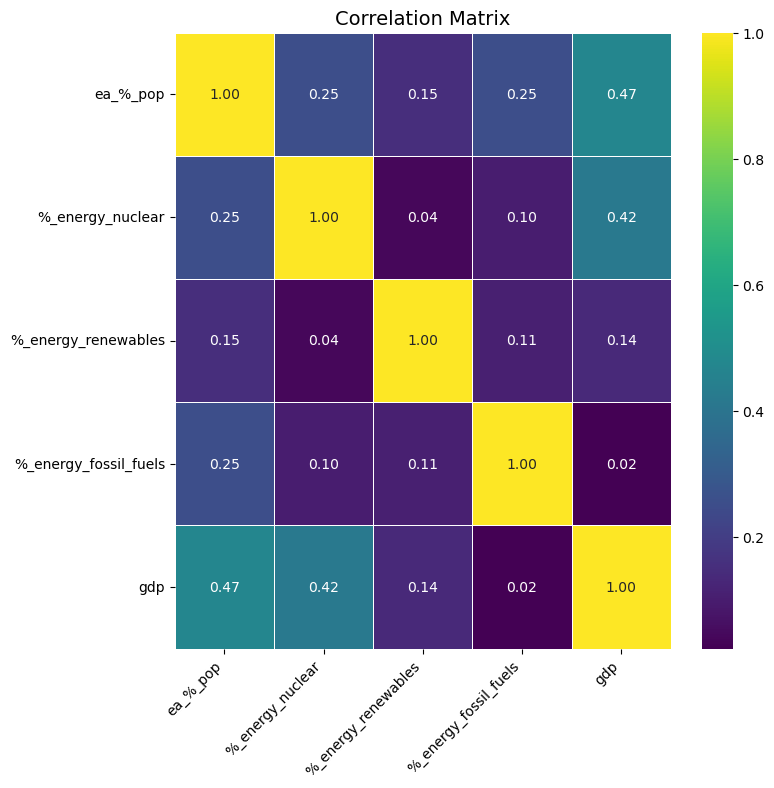

In [22]:
#create a heatmap using seaborn

f,ax = plt.subplots(figsize=(8,8))

corr = sns.heatmap(df_subset.corr(), annot = True, cmap='viridis', fmt='.2f', linewidths =.5, ax = ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.title('Correlation Matrix', fontsize=14)

C:\users\jacob\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


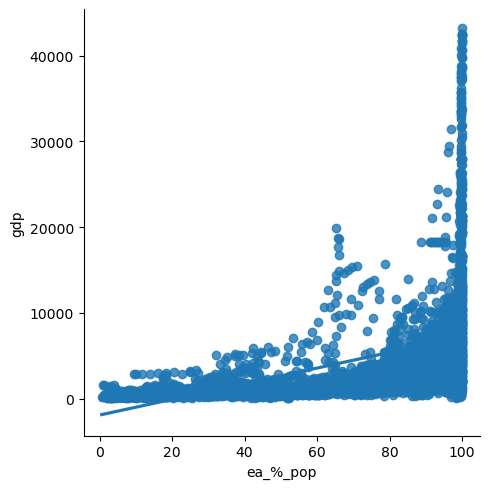

In [23]:
#create scatter plot between gdp and ea_%_pop
sns.lmplot(x = 'ea_%_pop', y = 'gdp', data = ea_gdp_subset)

In [29]:
#create a subset of the data only contains values greater than 0 and less than 100 for electricity access
#contains only data with percent of energy from nuclear greater than 0 and less than 60
ea_nuc_subset = df[(df['ea_%_pop'] < 100) & (df['ea_%_pop'] > 0) & ((df['%_energy_nuclear'] > 0) & (df['%_energy_nuclear'] < 60))]

In [30]:
ea_nuc_subset.shape

(897, 8)

C:\users\jacob\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


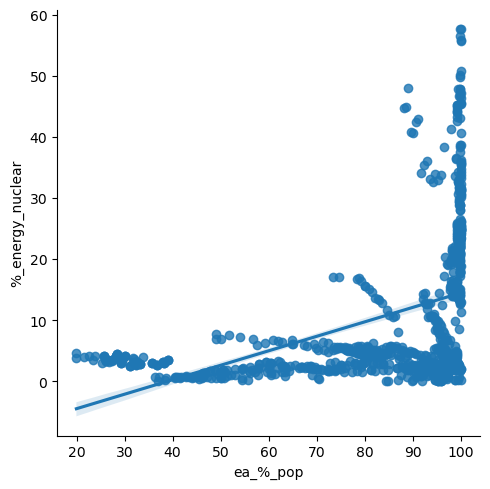

In [31]:
#create scatter plot between gdp and ea_%_pop
sns.lmplot(x = 'ea_%_pop', y = '%_energy_nuclear', data = ea_nuc_subset)